In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [2]:
X, y = mnist["data"], mnist["target"]
print("X shape:", X.shape, ", y shape:", y.shape)

X shape: (70000, 784) , y shape: (70000,)


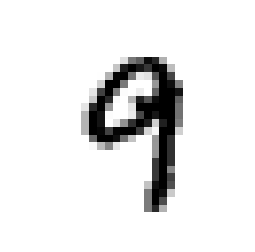

In [3]:
test_digit = X[55555]
test_digit_image = test_digit.reshape(28,28)

plt.imshow(test_digit_image, cmap = matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

In [4]:
y[55555]

9.0

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [8]:
sgd_clf.predict([test_digit])

array([ 3.])

In [9]:
# Confusion Matrix
from sklearn.model_selection import cross_val_predict

y_train_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_sgd)

array([[5649,    6,   82,   24,   11,   18,   34,   15,   74,   10],
       [   2, 6538,   90,   16,    3,    5,    2,   21,   54,   11],
       [ 127,  141, 5104,  150,   42,   23,   92,  106,  116,   57],
       [  43,   60,  239, 5302,   12,  178,   28,   85,  112,   72],
       [  34,   62,   91,   11, 4797,   11,   50,  101,   72,  613],
       [ 105,   95,  153,  388,  122, 3834,  122,   67,  358,  177],
       [  53,   49,  314,    4,   43,   79, 5317,   17,   38,    4],
       [  25,   39,  155,   53,   44,    4,    4, 5631,   26,  284],
       [  84,  483,  312,  349,   66,  199,   55,   53, 3949,  301],
       [  39,   79,  130,   96,  415,   14,    3,  605,  131, 4437]])

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

def precision_recall(train, prediction):
    p = precision_score(train, prediction, average='weighted')
    r = recall_score(train, prediction, average='weighted')
    f = f1_score(train, prediction, average='weighted')
    print("Precision", p)
    print("Recall:", r)
    print("F1 Score:", f)

In [15]:
%%time
from sklearn.model_selection import cross_val_score

y_scores_sgd = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

CPU times: user 6.66 s, sys: 316 ms, total: 6.98 s
Wall time: 6.66 s


In [14]:
%%time
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_jobs=-1, random_state=42)
y_scores_forest = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

CPU times: user 11.4 s, sys: 336 ms, total: 11.8 s
Wall time: 3.05 s


In [16]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1)
y_scores_knn = cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

CPU times: user 1h 15min 44s, sys: 10.5 s, total: 1h 15min 55s
Wall time: 10min 31s


In [18]:
%%time
from sklearn.neural_network import MLPClassifier

MLP_clf = MLPClassifier(random_state=42)
y_scores_MLP = cross_val_score(MLP_clf, X_train, y_train, cv=3, scoring="accuracy")

CPU times: user 2min 25s, sys: 1.71 s, total: 2min 27s
Wall time: 37.1 s


In [20]:
print("SGD:", y_scores_sgd)
print("Random Forest:", y_scores_forest)
print("KNN:", y_scores_knn)
print("MLP:", y_scores_MLP)

SGD: [ 0.84018196  0.860093    0.82762414]
Random Forest: [ 0.94081184  0.94044702  0.94184128]
KNN: [ 0.96930614  0.96944847  0.96654498]
MLP: [ 0.94926015  0.94269713  0.946642  ]
